Enter the order of the polynomial to fit SOC = f(OCV):  8
Enter number of VOCV points:  10000


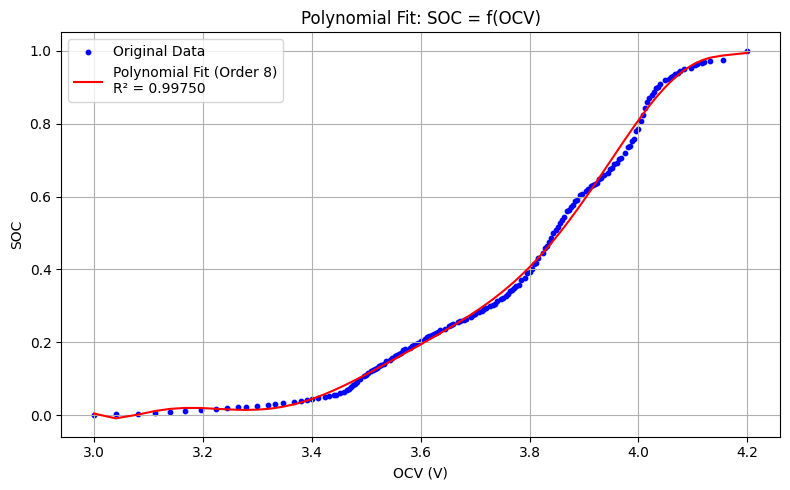


Polynomial Coefficients (lowest to highest order):
VOCV^0: 2666969.412248
VOCV^1: -6024374.129656
VOCV^2: 5940765.930860
VOCV^3: -3340336.076651
VOCV^4: 1171306.194279
VOCV^5: -262289.532757
VOCV^6: 36628.562140
VOCV^7: -2916.537210
VOCV^8: 101.376844

R² = 0.997501
Coefficients saved to fitted_polynomial_coeffs.csv
socPol.csv has been created with SOC vs VOCV data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def main():
    # Ask user for polynomial order
    order = int(input("Enter the order of the polynomial to fit SOC = f(OCV): "))

    # Ask user for number of points for VOCV mapping
    num_points = int(input("Enter number of VOCV points: "))

    # Load data from CSV (must have columns 'OCV' and 'SOC')
    df = pd.read_csv('extracted.csv')
    if 'OCV' not in df.columns or 'SOC' not in df.columns:
        raise ValueError("CSV must contain 'OCV' and 'SOC' columns.")

    ocv = df['OCV'].values
    soc = df['SOC'].values

    # Fit polynomial: SOC = f(OCV)
    coeffs = np.polyfit(ocv, soc, deg=order)
    soc_fit = np.polyval(coeffs, ocv)

    # Calculate R²
    r2 = 1 - np.sum((soc - soc_fit) ** 2) / np.sum((soc - np.mean(soc)) ** 2)

    # Save polynomial coefficients
    coeffs_df = pd.DataFrame({'Coefficient': coeffs[::-1], 'Order': list(range(len(coeffs)))})
    coeffs_df.to_csv('fitted_polynomial_coeffs.csv', index=False)

    # Plot the fit
    plt.figure(figsize=(8, 5))
    plt.scatter(ocv, soc, label='Original Data', color='blue', s=10)
    plt.plot(ocv, soc_fit, label=f'Polynomial Fit (Order {order})\nR² = {r2:.5f}', color='red')
    plt.xlabel('OCV (V)')
    plt.ylabel('SOC')
    plt.title('Polynomial Fit: SOC = f(OCV)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print coefficients
    print("\nPolynomial Coefficients (lowest to highest order):")
    for i, c in enumerate(coeffs[::-1]):
        print(f"VOCV^{i}: {c:.6f}")
    print(f"\nR² = {r2:.6f}")
    print("Coefficients saved to fitted_polynomial_coeffs.csv")

    # ---- Generate socPol.csv ----
    vocv_range = np.linspace(4.2, 3.0, num=num_points)
    soc_from_polynomial = np.polyval(coeffs, vocv_range)

    df_pol = pd.DataFrame({
        'SOC': soc_from_polynomial,
        'OCV': vocv_range
    })

    df_pol.to_csv('socPol.csv', index=False)
    print("socPol.csv has been created with SOC vs VOCV data.")

if __name__ == '__main__':
    main()
